### Problema 2 - Fruits and Vegetables Recognizer:

##### Parte #1: Dataset:

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = r'carpeta_de_entrenamiento'  
validation_dir = r'carpeta_de_validacion'
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          
    rotation_range=40,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest'       
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   
    batch_size=32,            
    class_mode='categorical'  
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical'
)
print(f"Total imágenes de entrenamiento: {train_generator.samples}")
print(f"Total imágenes de validación: {validation_generator.samples}")

Found 2943 images belonging to 6 classes.
Found 735 images belonging to 6 classes.
Total imágenes de entrenamiento: 2943
Total imágenes de validación: 735


##### Parte #2: Diseño y Entrenamiento de la Red Neuronal Convolucional:

In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
num_classes = 6 
input_shape = (150, 150, 3)
### Modelo 1
def create_model_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
### Modelo 2
def create_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
### Modelo 3
def create_model_3():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
def train_model(model, train_generator, validation_generator, epochs=10):
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )
    return history
model_1 = create_model_1()
history_1 = train_model(model_1, train_generator, validation_generator, epochs=10)
model_2 = create_model_2()
history_2 = train_model(model_2, train_generator, validation_generator, epochs=10)
model_3 = create_model_3()
history_3 = train_model(model_3, train_generator, validation_generator, epochs=10)

c:\Users\erodr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\erodr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 401ms/step - accuracy: 0.3276 - loss: 1.8635 - val_accuracy: 0.6667 - val_loss: 1.0364
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.6326 - loss: 0.9519 - val_accuracy: 0.7197 - val_loss: 0.8106
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 389ms/step - accuracy: 0.7293 - loss: 0.7741 - val_accuracy: 0.7673 - val_loss: 0.8396
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.7643 - loss: 0.6527 - val_accuracy: 0.7932 - val_loss: 0.6500
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 354ms/step - accuracy: 0.8040 - loss: 0.5808 - val_accuracy: 0.8313 - val_loss: 0.6030
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.8577 - loss: 0.4365 - val_accuracy: 0.8748 - val_loss: 0.4332
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 354ms/step - accuracy: 0.8611 - loss: 0.4007 - val_accuracy: 0.8327 - val_loss: 0.5248
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 347ms/step - accuracy: 0.8660 - loss: 0.3743 - val_accuracy: 0.893

c:\Users\erodr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - accuracy: 0.3690 - loss: 1.5541 - val_accuracy: 0.6354 - val_loss: 0.9246
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.7215 - loss: 0.7613 - val_accuracy: 0.7878 - val_loss: 0.5783
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 372ms/step - accuracy: 0.8074 - loss: 0.5531 - val_accuracy: 0.8286 - val_loss: 0.5605
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 357ms/step - accuracy: 0.8308 - loss: 0.4623 - val_accuracy: 0.9034 - val_loss: 0.3405
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 350ms/step - accuracy: 0.8861 - loss: 0.3201 - val_accuracy: 0.8803 - val_loss: 0.3689
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 356ms/step - accuracy: 0.9014 - loss: 0.3010 - val_accuracy: 0.8898 - val_loss: 0.4412
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 362ms/step - accuracy: 0.9014 - loss: 0.2797 - val_accuracy: 0.8993 - val_loss: 0.3298
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 359ms/step - accuracy: 0.9040 - loss: 0.2686 - val_accu

##### El Modelo 2 es la opción más adecuada debido a su alta precisión en la validación (92.38%), lo que indica que clasifica imágenes con mayor exactitud que los otros modelos, y su baja pérdida en la validación (0.3135), lo que demuestra que sus predicciones son más estables y menos propensas a errores graves, logrando además un equilibrio sólido entre precisión y estabilidad, sin sobreajustarse a los datos de entrenamiento.

In [3]:
model_2.save('modelo_2.h5')

##### Parte #3: Comprobación

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
La imagen es de: FreshCarrot


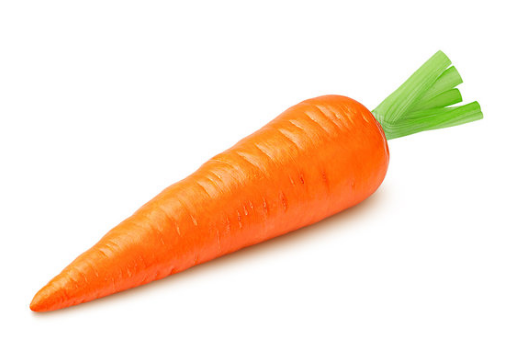

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
model_path = 'modelo_2.h5'
model = load_model(model_path)
image_path = r'imagen2.jpg'
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    return img_array
img_preprocessed = preprocess_image(image_path)
prediction = model.predict(img_preprocessed)
class_names = ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshCarrot', 'FreshCucumber', 'FreshMango']
predicted_class = class_names[np.argmax(prediction)]

print(f'La imagen es de: {predicted_class}')
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()